In [1]:
import gensim
import nltk
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize, punkt
from gensim.models import KeyedVectors

#setting up libraries
import pandas as pd
pd.set_option('display.max_columns', 50)
import numpy as np
import pickle
import matplotlib.pyplot as plt
import time
import spacy


In [2]:
df_big = pd.read_pickle("/home/seh6fy/git/publicrd/data/prd/Paper/FR_meta_and_final_tokens_23DEC21.pkl")
df = pd.read_csv("/home/seh6fy/git/publicrd/data/prd/Digital_abstract_labelled/labelled_abstracts.csv")

In [3]:
df_big = df_big[~df_big.ABSTRACT.isnull()]

In [4]:
# df = df[~df.label.isnull()]
# df_big = df_big[~df_big.ABSTRACT.isnull()]

In [5]:
# df_nsf = df.loc[df['label'] == 'Big-data']
# df_nsf = df_nsf.iloc[0:384,]

In [6]:
# df_nasa = df.loc[df['label'] == 'Non Big-data']
# df_nasa = df_nasa.iloc[0:384,]

In [7]:
# frames = [df_nsf, df_nasa]
# df_split = pd.concat(frames)

In [8]:
#creates a dataframe with the training and testing data 
both = [df, df_big]
new_df= pd.concat(both)

In [9]:
new_df= new_df.reset_index(level=None, drop=True, inplace=False, col_level=0, col_fill='')

In [10]:
new_df

,Unnamed: 0,Duplicates,index,PROJECT_ID,ABSTRACT,Is it related to Big-Data,Expert name,label,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,FY_TOTAL_COST_SUM,NUM_RECORDS,final_tokens
0,0.0,0.0,979.0,950056,ï»¿ DESCRIPTION (provided by applicant): Adv...,1,Kristian,Big-data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,0.0,816.0,1178172,Project Summary/AbstractThe establishment of t...,1,Kristian,Big-data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,0.0,1096.0,163037,DESCRIPTION (provided by applicant): The long-...,0,Kristian,Non Big-data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,0.0,725.0,880197,DESCRIPTION (provided by applicant): The most ...,0,Kristian,Non Big-data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,0.0,92.0,887331,Transsphenoidal surgery (TSS) is the best trea...,0,Kristian,Non Big-data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145064,NaN,NaN,NaN,1294186,Circadian rhythms are fundamental endogenous p...,NaN,NaN,NaN,NaN,Revealing the Palatable Meal-Inducible Circadi...,NSF,NSF,NaN,1931115,5/1/2020 12:00:00 AM,4/30/2025 12:00:00 AM,NaN,NaN,NaN,800771545,UNIVERSITY OF TEXAS SW MED CTR,NaN,NaN,NaN,NaN,NaN,NaN,47.074,2020,700000.0,NaN,1.0,0.0,700000.0,1.0,circadian_rhythm fundamental endogenous proper...
1145065,NaN,NaN,NaN,1294187,Recent research suggests that learning about g...,NaN,NaN,NaN,NaN,Collaborative Research : Improving the teachin...,NSF,NSF,NaN,1956119,7/1/2020 12:00:00 AM,6/30/2025 12:00:00 AM,NaN,NaN,NaN,170230239,UNIVERSITY OF TEXAS AUSTIN,NaN,NaN,NaN,NaN,NaN,NaN,47.076,2020,136238.0,NaN,3.0,0.0,672158.0,3.0,recent research suggest learn genetic high sch...
1145066,NaN,NaN,NaN,1294188,The COVID-19 pandemic has caused unprecedented...,NaN,NaN,NaN,NaN,Collaborative Research: RAPID: Maintain Mobili...,NSF,NSF,NaN,2028098,4/15/2020 12:00:00 AM,3/31/2021 12:00:00 AM,NaN,NaN,NaN,003387891,UNIVERSITY OF TENNESSEE KNOXVILLE,NaN,NaN,NaN,NaN,NaN,NaN,47.041,2020,132226.0,NaN,2.0,0.0,182205.0,2.0,covid_19_pandemic cause unprecedented disrupti...
1145067,NaN,NaN,NaN,1294189,Subduction zones – locations where one of the ...,NaN,NaN,NaN,NaN,Collaborative Research: Synthesizing arc-scale...,NSF,NSF,NaN,1948834,7/1/2020 12:00:00 AM,6/30/2023 12:00:00 AM,NaN,NaN,NaN,872612445,CORNELL UNIVERSITY ITHACA,NaN,NaN,NaN,NaN,NaN,NaN,47.050,2020,30484.0,NaN,3.0,0.0,191004.0,3.0,subduction_zone location earth tectonic_plate ...


In [11]:
indicies = new_df.index

In [12]:
data = new_df['ABSTRACT']

In [ ]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(data)]
tagged_df = pd.DataFrame(tagged_data)

In [ ]:
# tagged_df

In [ ]:
new_df['words'] = tagged_df['words']
new_df['tags'] = tagged_df['tags']
new_df.head()

In [ ]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=100, epochs=20) #min_count=2 - min number of times it shows up
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)
model.save("d2v.model")

In [ ]:
model = Doc2Vec.load("d2v.model")

In [ ]:
vector = []
for i in range(0, len(new_df)):
    vectorthis = (model.dv[new_df['tags'][i]]).tolist()
    vector.append(vectorthis)

In [ ]:
mat = []
for i in vector:
    for x in i:
        mat.append(x)

In [ ]:
training = pd.DataFrame(mat)

In [ ]:
training

In [235]:
# training = pd.read_csv("/home/seh6fy/git/publicrd/src/Digitalization/training.csv")

In [236]:
training

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,index
0,-1.635715,-1.340076,0.988379,-0.113466,-0.569510,1.118025,0.344871,-0.376649,0.090660,0.270248,-0.013042,0.080885,-0.394706,-0.644102,-0.528243,0.111764,0.998835,-0.360950,-1.055960,-0.805546,0.629137,0.735110,0.148364,0.219876,-0.380245,-0.592154,-0.641714,0.664598,-0.893042,1.028935,0
1,0.008886,-0.863726,-0.143362,-0.948580,-0.553668,1.253320,0.817424,0.629286,-0.734058,-0.758593,0.751423,0.293909,0.975798,-0.633462,-0.382713,0.348565,0.425877,-0.171481,-1.447438,0.040709,1.585015,-0.475335,-0.365116,0.408527,-0.596568,-0.585623,-0.914472,0.324686,0.276771,-0.404423,1
2,0.234176,-1.018597,-0.084262,0.444664,-0.695537,0.777568,0.509353,0.033958,-0.595309,-0.121373,0.173920,0.709697,-0.539137,-0.952338,-0.373486,-0.370334,-0.207990,0.380193,-1.717552,0.722229,0.761403,0.032613,0.091299,1.552779,1.024682,-0.511264,0.619557,0.706997,-0.462319,0.472358,2
3,-0.160165,0.023118,-0.386914,0.284941,-1.440314,1.466713,1.355928,1.278494,-0.841536,0.600822,-0.358423,1.871807,0.111805,-1.171679,-1.205297,0.079944,-0.053499,-0.549502,-1.722031,0.200253,0.749093,0.346989,-0.501968,0.832803,0.976250,0.005266,-0.344164,0.464254,-0.480846,2.606320,3
4,1.227663,-0.043916,-1.204424,1.663350,-1.793785,1.276028,1.395125,-0.503186,-0.369666,-0.526047,0.598212,0.117250,-1.376746,-1.048703,-1.899705,0.363197,-1.075822,-1.852466,-0.700540,1.998158,1.485292,1.384443,-0.268582,1.506378,0.997379,1.019567,-0.687389,-0.091672,-0.202612,2.958401,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145064,-0.035305,-1.068184,0.172749,-0.174733,-0.099104,-0.740731,1.482408,0.183953,0.803658,0.200214,0.777835,1.207984,-1.020545,-1.447690,-1.094729,0.723294,0.144930,0.979805,-1.400223,1.416476,-0.128918,0.120427,-0.681495,1.284406,1.398231,-1.096162,0.538078,0.447566,-1.090873,0.266789,1145064
1145065,0.294281,-0.949970,0.040973,0.345105,-0.228480,-0.334493,1.022964,-0.335028,0.845101,-0.149280,0.087293,1.762313,-0.748312,0.391675,-0.337289,0.310626,0.555389,-1.714674,-1.326789,-0.677348,1.355527,0.041176,-0.344955,1.516804,0.667866,-1.136598,1.211715,1.204671,-0.912225,-0.295215,1145065
1145066,-0.836414,0.434452,2.289995,0.591762,0.204093,0.107915,-0.363489,-0.115381,-1.436226,1.083403,0.015544,0.222220,-1.003932,-0.038997,1.107111,0.584803,-0.404203,0.219538,-0.808297,0.631764,-0.252898,1.258088,0.199242,-0.668627,-0.102680,0.850418,-0.531196,-0.295420,0.543261,-1.815650,1145066
1145067,-0.870892,-1.341344,0.317780,-0.165160,-0.371489,0.420929,0.273076,-0.108220,-0.469883,-0.370821,0.052602,0.400499,-0.106426,-0.247394,0.313223,0.274554,0.191487,0.066586,-0.058183,-0.168728,-0.125761,0.272318,-0.511565,-0.421968,0.902774,1.521843,0.022058,1.137022,-0.659045,-0.879058,1145067


In [237]:
# training.to_csv(r'training.csv')

In [238]:
#training model on labeled and whole corpus
trainingnp = training.to_numpy()

In [239]:
len(trainingnp)

1145069

In [240]:
len(indicies)

1145069

In [241]:
#creating corpus of just labeled documents
train_df = new_df[~new_df.label.isnull()]

In [242]:
train_df= train_df.reset_index(level=None, drop=True, inplace=False, col_level=0, col_fill='')

In [243]:
train_df_id = train_df.index

In [244]:
#trained model on only labeled
training['index'] = training.index
training_df = training.loc[training["index"].isin(train_df_id)]

In [245]:
training_df = training_df.drop(columns='index')

In [246]:
training_df = training_df.to_numpy()

In [247]:
#sampling from the training dataframe
training_data = train_df.sample(frac=0.80, random_state=25)
testing_data = train_df.drop(training_data.index)

In [248]:
train_id = training_data.index
test_id = testing_data.index

In [249]:
x_train = training_df[train_id]
x_test = training_df[test_id]

In [250]:
train_df['index'] = train_df.index
y_test = train_df.loc[train_df["index"].isin(test_id)]
y_test = y_test['label']

In [251]:
train_df['index'] = train_df.index
y_train = train_df.loc[train_df["index"].isin(train_id)]
y_train = y_train['label']

In [252]:
import math

In [253]:
neighbors = int(math.sqrt(len(train_df.index)))

In [281]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = neighbors)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=34)

In [282]:
# from sklearn.svm import SVC
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# clf = make_pipeline(StandardScaler(), SVC(gamma='auto', ))
# clf.fit(x_train, y_train)


In [283]:
y_pred = classifier.predict(x_test)

In [284]:
from sklearn.metrics import classification_report, confusion_matrix
confusion = (confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Big-data       0.20      0.03      0.05       104
Non Big-data       0.55      0.91      0.69       136

    accuracy                           0.53       240
   macro avg       0.38      0.47      0.37       240
weighted avg       0.40      0.53      0.41       240



In [285]:
print(confusion_matrix(y_test, y_pred))

[[  3 101]
 [ 12 124]]


In [286]:
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

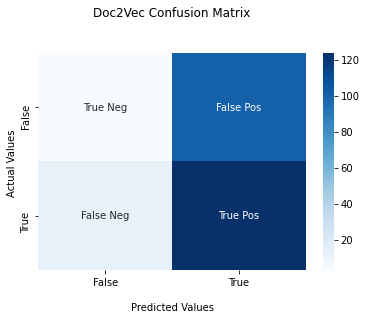

<Figure size 432x288 with 0 Axes>

In [287]:
labels = ['True Neg','False Pos','False Neg','True Pos']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues')

ax.set_title('Doc2Vec Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
plt.savefig('doc2vec.PNG')

In [291]:
final_test = trainingnp[indicies]

In [293]:
final_test

array([[-1.63571465e+00, -1.34007585e+00,  9.88378644e-01, ...,
        -8.93041849e-01,  1.02893484e+00,  0.00000000e+00],
       [ 8.88645183e-03, -8.63726437e-01, -1.43362105e-01, ...,
         2.76770562e-01, -4.04422998e-01,  1.00000000e+00],
       [ 2.34176204e-01, -1.01859665e+00, -8.42623264e-02, ...,
        -4.62318689e-01,  4.72358376e-01,  2.00000000e+00],
       ...,
       [-8.36413860e-01,  4.34451967e-01,  2.28999519e+00, ...,
         5.43260694e-01, -1.81564987e+00,  1.14506600e+06],
       [-8.70892227e-01, -1.34134388e+00,  3.17779750e-01, ...,
        -6.59044862e-01, -8.79057825e-01,  1.14506700e+06],
       [-1.55344176e+00, -1.93127766e-01,  1.07691467e-01, ...,
         2.26880148e-01, -1.37506473e+00,  1.14506800e+06]])

In [292]:
corpus_pred = classifier.predict(final_test)

ValueError: query data dimension must match training data dimension

In [126]:
predictions2 = new_df.loc[new_df.index,]
predictions2['PREDICTIONS'] = corpus_pred

In [127]:
predictions2 = predictions2[["label", "PREDICTIONS","ABSTRACT"]]

In [128]:
big_data = predictions2.loc[predictions2['PREDICTIONS'] == 'Big-data']

In [129]:
index = big_data.index

In [130]:
final_frame = new_df.loc[new_df["index"].isin(index)]

In [131]:
final_frame = final_frame[final_frame.label.isnull()]

In [162]:
final_frame.DEPARTMENT.value_counts()

HHS     380192
NSF      61325
USDA     17437
NASA     14999
VA        5158
DOD       3138
ED        1153
EPA        960
Name: DEPARTMENT, dtype: int64

In [165]:
final_frame.CFDA_CODE.value_counts()[:20]

93.855    33805
93.859    22056
93.242    18860
93.389    17623
93.847    17458
93.853    15315
47.049    14552
93.837    13905
93.865    13260
93.866    13079
93.279    12894
43.001    10987
47.070    10419
47.041     9966
93.396     8992
93.393     8698
93.701     8322
10.203     8246
47.075     7032
47.074     6788
Name: CFDA_CODE, dtype: int64

In [132]:
final_frame.to_csv(r'doc2vec_final.csv')

In [1180]:
# predictions['PREDICTIONS'].value_counts()

In [1181]:
# predictions['label'].value_counts()

In [1182]:
# df_split['label'].value_counts()

In [1183]:
# predictions.to_csv('precision.csv')

In [1184]:
predictions['PREDICTIONS'].value_counts()

Non Big-data    65
Big-data        50
Name: PREDICTIONS, dtype: int64

In [1185]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[30 31]
 [20 34]]
              precision    recall  f1-score   support

    Big-data       0.60      0.49      0.54        61
Non Big-data       0.52      0.63      0.57        54

    accuracy                           0.56       115
   macro avg       0.56      0.56      0.56       115
weighted avg       0.56      0.56      0.56       115



##### error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))